In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

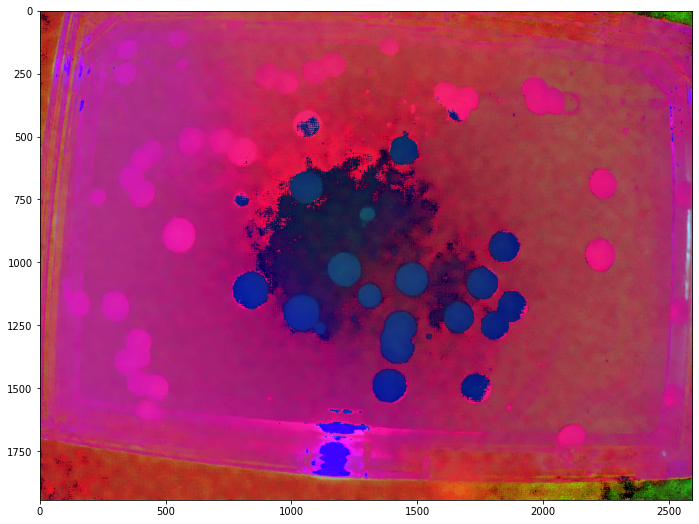

In [41]:
image = 'real.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV_FULL)

lower_gray = np.array([0,0,0], dtype=np.uint8)
upper_gray = np.array([100,100,100], dtype=np.uint8)

mask = cv2.inRange(img, lower_gray, upper_gray)
res = cv2.bitwise_and(img, img, mask=mask)

gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img)

In [42]:
all_circs = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 2, 120, param1=50, param2=30, minRadius=20, maxRadius=100)
all_circs_rounded = np.uint16(np.around(all_circs))

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vdbynpat\opencv\modules\imgproc\src\hough.cpp:2253: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'cv::HoughCircles'


In [37]:

# print (all_circs_rounded)
# print (all_circs_rounded.shape)
# print ('there are' + str(all_circs_rounded.shape[1]) + 'circles')

In [38]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_orig, (i[0],i[1]), i[2], (50, 200, 200), 5)
    cv2.circle(img_orig, (i[0], i[1]), 2, (255,0,0), 3)
    count += 1

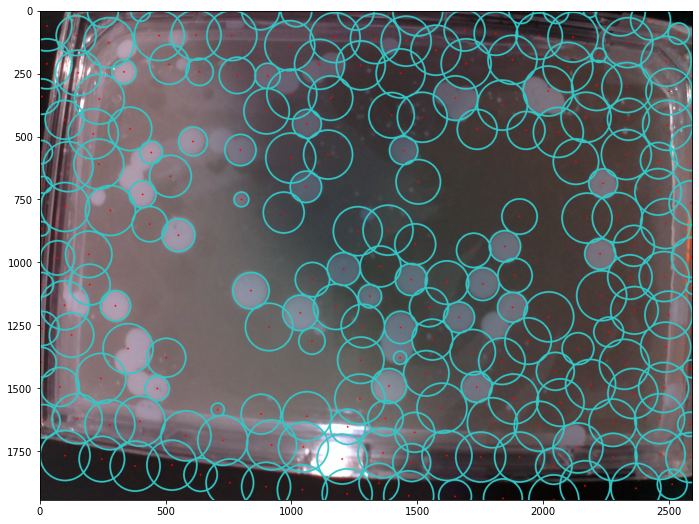

In [39]:
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img_orig)
plt.imsave("1.png", img_orig)